In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
df = pd.read_csv("cumulative-deaths-and-cases-covid-19.csv")


In [4]:
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89066 entries, 0 to 89065
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Entity                                  89066 non-null  object 
 1   Code                                    81533 non-null  object 
 2   Day                                     89066 non-null  object 
 3   Total confirmed deaths due to COVID-19  79187 non-null  float64
 4   Total confirmed cases of COVID-19       89065 non-null  float64
dtypes: float64(2), object(3)
memory usage: 3.4+ MB


,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19
count,7.918700e+04,8.906500e+04
mean,5.222917e+04,1.937118e+06
std,2.565713e+05,1.090983e+07
min,1.000000e+00,1.000000e+00
25%,5.100000e+01,1.085000e+03
50%,3.860000e+02,1.285000e+04
75%,4.561500e+03,1.470160e+05
max,3.317325e+06,1.596908e+08


In [16]:
df['Day'] = pd.to_datetime(df['Day'])


In [14]:
df = df.rename(columns={
    'Total confirmed cases of COVID-19': 'total_cases',
    'Total confirmed deaths due to COVID-19': 'total_deaths'
})


In [13]:
df['total_deaths'] = df['total_deaths'].fillna(0)
df = df.dropna(subset=['total_cases'])


In [15]:
df = df[~df['Entity'].isin(['World', 'Asia', 'Europe', 'Africa'])]


In [9]:
df['death_rate'] = (df['total_deaths'] / df['total_cases']) * 100
df['death_rate'] = df['death_rate'].replace([np.inf, -np.inf], 0)


In [11]:
df['year'] = df['Day'].dt.year
df['month'] = df['Day'].dt.month


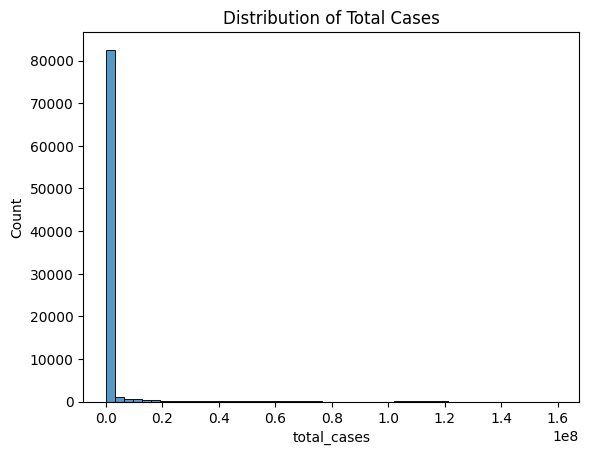

In [12]:
plt.figure()
sns.histplot(df['total_cases'], bins=50)
plt.title("Distribution of Total Cases")
plt.show()


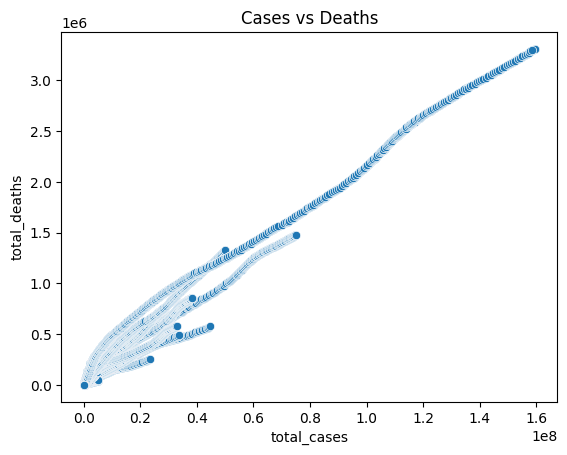

In [17]:
plt.figure()
sns.scatterplot(x='total_cases', y='total_deaths', data=df)
plt.title("Cases vs Deaths")
plt.show()


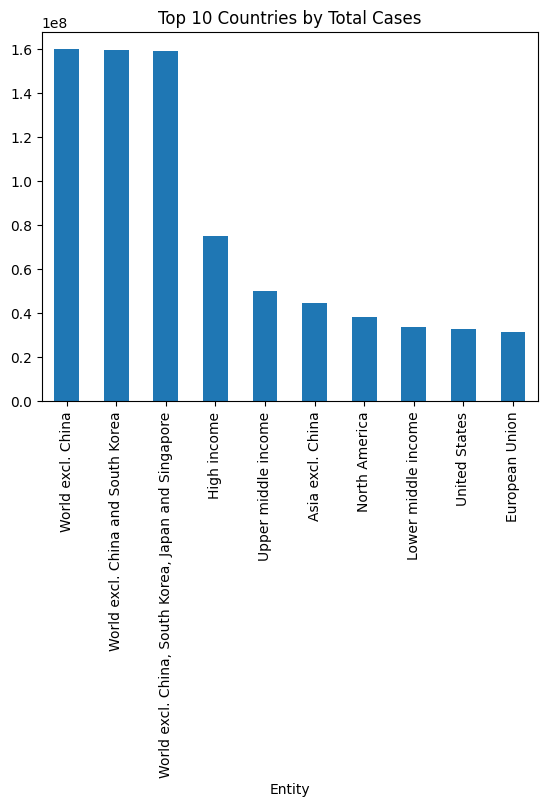

In [18]:
top_countries = (
    df.groupby('Entity')['total_cases']
    .max()
    .sort_values(ascending=False)
    .head(10)
)

top_countries.plot(kind='bar')
plt.title("Top 10 Countries by Total Cases")
plt.show()


In [19]:
X = df[['total_cases', 'month', 'year']]
y = df['total_deaths']


In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [21]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [22]:
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 10078.100005515005
MSE: 922742763.1570724
R2 Score: 0.9803128678162737


In [24]:
sample = pd.DataFrame({
    'total_cases': [5000000],
    'month': [6],
    'year': [2022]
})

prediction = model.predict(sample)
print("Predicted deaths:", int(prediction[0]))


Predicted deaths: 101832
